In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
data=pd.read_csv(r"C:\Users\USER\OneDrive\Documents\creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.shape

(284807, 31)

In [4]:
data2=data[:28407]

In [6]:
print('data2 shape',data2.shape)
print('data2 columns',data2.columns)

data2 shape (28407, 31)
data2 columns Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [7]:
data2.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<Axes: ylabel='Frequency'>

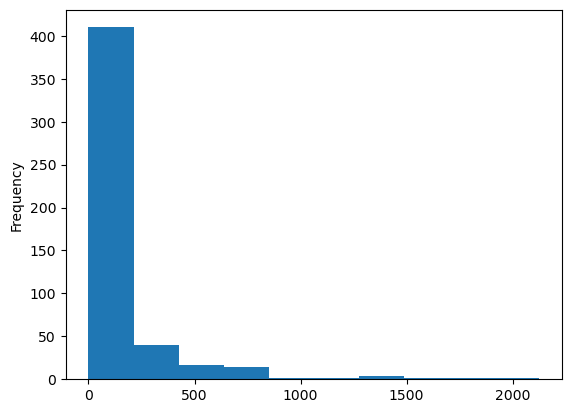

In [11]:
fraud['Amount'].plot(kind='hist')

<Axes: ylabel='Frequency'>

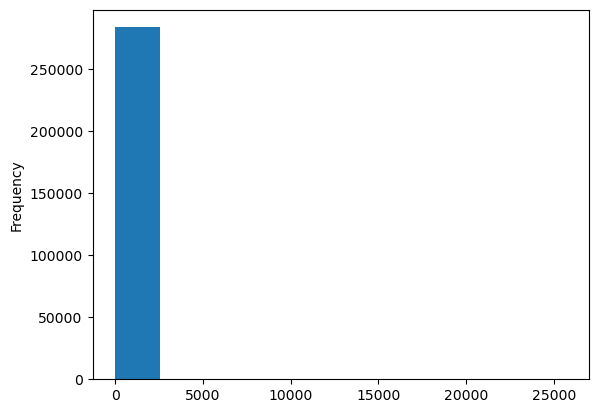

In [12]:
legit['Amount'].plot(kind='hist')

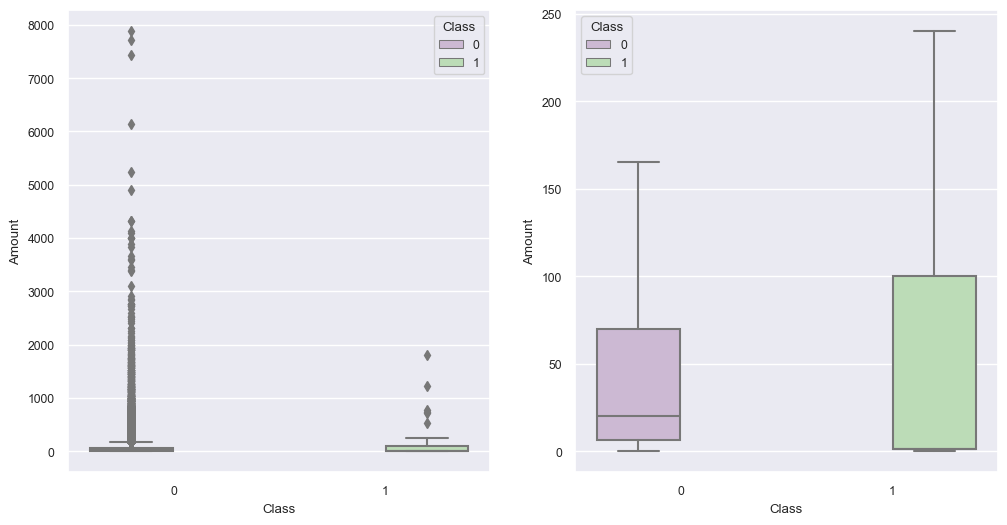

In [53]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=data2, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=data2, palette="PRGn",showfliers=False)
plt.show();

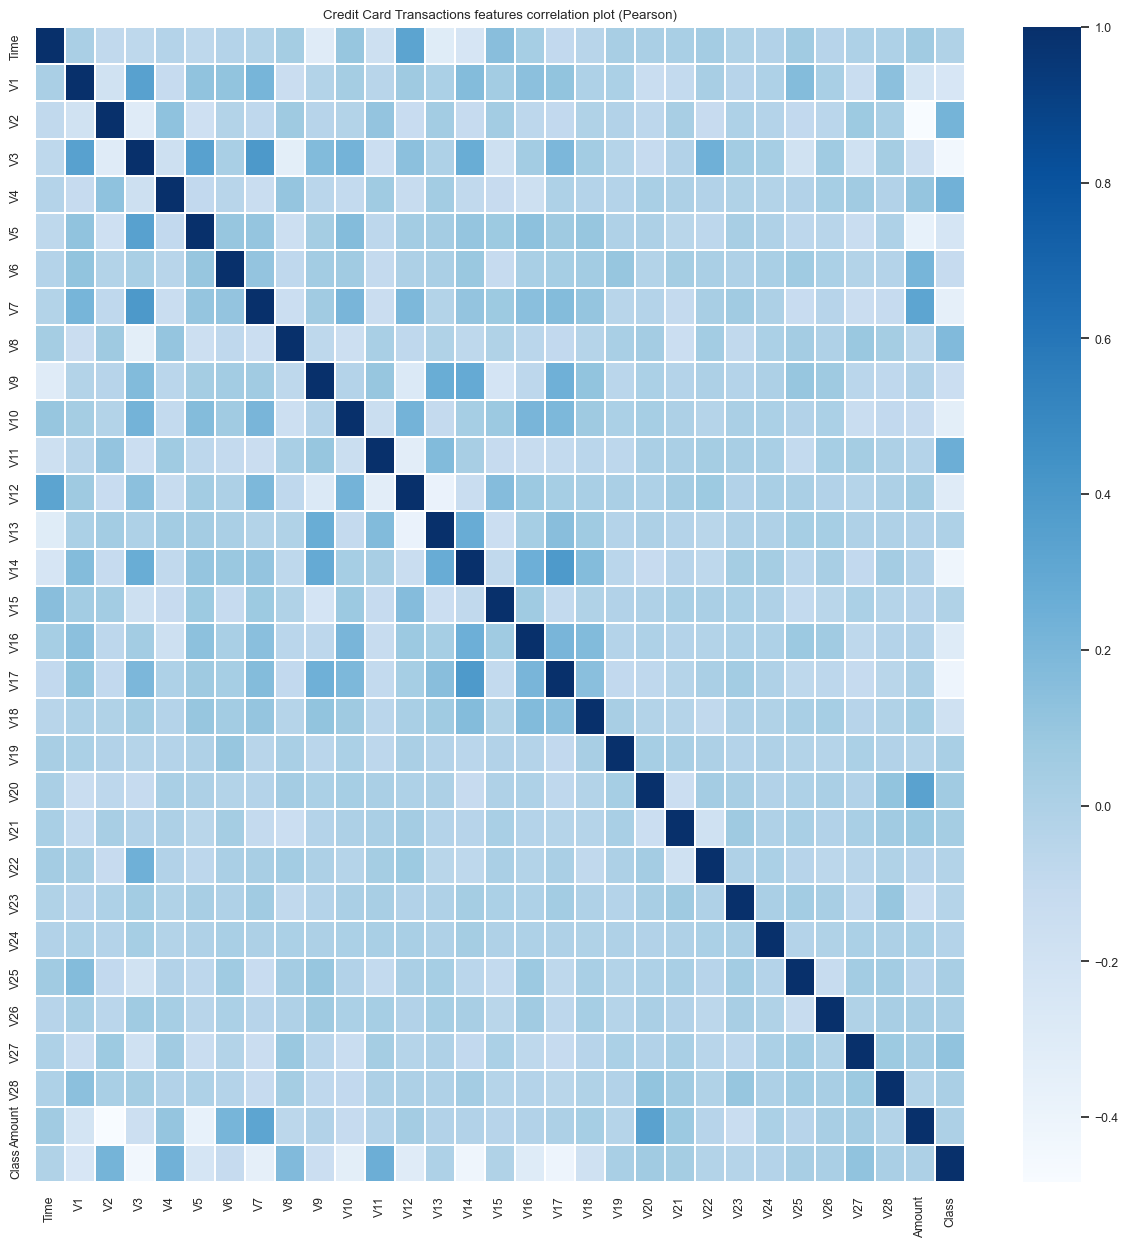

In [54]:
plt.figure(figsize = (15,15))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = data2.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Blues")
plt.show()

#the data is highly unbalanced 

#for data balancing we will use imblearn 
In order to cope with unbalanced data, there are 2 options :

    - **Undersampling** : Trim down the majority samples of the target variable.
    - **Oversampling** : Increase the minority samples of the target variable to the majority samples.
    

In [8]:
data2['Class'].value_counts()

Class
0    28314
1       93
Name: count, dtype: int64

In [9]:
from imblearn.over_sampling import SMOTE

In [7]:
# balance the dataset
#using SMOTE "synthetic minority over sampling technique"

In [10]:
oversample=SMOTE(sampling_strategy=0.5)

In [11]:
fraud=data2[data2['Class']==1]

legit=data2[data2["Class"]==0]

In [12]:
data2.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,28407.000000,28407.000000,28407.000000,28407.000000,28407.000000,28407.000000,28407.000000,28407.000000,28407.000000,28407.000000,...,28407.000000,28407.000000,28407.000000,28407.000000,28407.000000,28407.000000,28407.000000,28407.000000,28407.000000,28407.000000
mean,20734.381807,-0.214708,0.141977,0.722977,0.218908,-0.200730,0.088376,-0.125303,0.028303,0.382365,...,-0.035020,-0.124988,-0.041669,0.009482,0.131491,0.022997,0.013719,0.004334,77.921781,0.003274
std,11920.447651,1.860929,1.544166,1.637129,1.424746,1.426364,1.324564,1.302683,1.310425,1.260936,...,0.799546,0.641880,0.542464,0.591867,0.435947,0.513003,0.391637,0.277060,219.669672,0.057125
min,0.000000,-30.552380,-40.978852,-31.103685,-5.172595,-42.147898,-23.496714,-26.548144,-41.484823,-7.175097,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.338556,-8.567638,-9.617915,0.000000,0.000000
25%,9308.000000,-0.950793,-0.431478,0.267322,-0.694850,-0.791635,-0.656982,-0.597833,-0.162128,-0.431127,...,-0.245997,-0.546354,-0.175530,-0.327758,-0.130770,-0.335905,-0.063340,-0.008154,6.470000,0.000000
50%,25240.000000,-0.256342,0.159530,0.852548,0.201253,-0.232905,-0.170210,-0.067956,0.033733,0.286763,...,-0.092639,-0.098721,-0.050298,0.063008,0.170519,-0.056214,0.008358,0.020264,19.990000,0.000000
75%,31588.500000,1.166136,0.797227,1.480356,1.102036,0.316351,0.474693,0.445255,0.291372,1.138667,...,0.080072,0.283366,0.075026,0.398759,0.414168,0.304416,0.091336,0.076605,69.990000,0.000000
max,34995.000000,1.960497,16.713389,4.101716,13.143668,34.099309,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,13.876221,4.014444,5.525093,3.517346,11.135740,4.860769,7879.420000,1.000000


In [13]:
features_data=data2.drop('Class',axis=1)

In [14]:
label_data=data2['Class']

In [15]:
transformed_feature,transformed_label=oversample.fit_resample(features_data,label_data)

In [16]:
print(f'new label count: {transformed_label.value_counts()}')
print(f'old label count: {data2.Class.value_counts()}')

new label count: Class
0    28314
1    14157
Name: count, dtype: int64
old label count: Class
0    28314
1       93
Name: count, dtype: int64


In [18]:
# to save the new balanced data into a new dataframe

new_data=pd.concat([transformed_feature,transformed_label],axis=1,join='outer')

In [19]:
new_data.shape

(42471, 31)

In [20]:
new_data['Class'].value_counts()

Class
0    28314
1    14157
Name: count, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.feature_selection import mutual_info_classif,SelectKBest
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [22]:
X=new_data.drop('Class',axis=1)
y=new_data['Class']


In [ ]:
#feature selection

In [23]:
from sklearn.ensemble import ExtraTreesRegressor

In [24]:
reg=ExtraTreesRegressor()

In [25]:
reg.fit(X,y)

ExtraTreesRegressor()

In [26]:
importances=reg.feature_importances_
importances

array([0.00404216, 0.00103679, 0.00885963, 0.09007003, 0.1753187 ,
       0.00056303, 0.00221916, 0.00125355, 0.00044358, 0.01477787,
       0.05657298, 0.0937829 , 0.13204888, 0.00166104, 0.22887283,
       0.0021019 , 0.0507792 , 0.1074165 , 0.00772106, 0.0039726 ,
       0.00086114, 0.00122925, 0.0011257 , 0.00051618, 0.0010333 ,
       0.000785  , 0.00346623, 0.00170846, 0.00478626, 0.00097407])

In [27]:
mi=mutual_info_classif(X,y)

print("mutual_info_classification:",mi)

mutual_info_classification: [0.27477618 0.29596453 0.44873602 0.4986922  0.53336887 0.25216747
 0.37467849 0.39551672 0.23915504 0.36194813 0.50467797 0.49400719
 0.50807236 0.09856209 0.55395621 0.09957716 0.42143875 0.46931375
 0.28067649 0.09068677 0.23920317 0.35110575 0.08856205 0.19652164
 0.16766202 0.18280004 0.22203565 0.35019589 0.33252916 0.29775449]


In [28]:
miz=pd.DataFrame(mi)

In [29]:
cols=X.columns
colsz=pd.DataFrame(cols)

In [30]:
feature_ranking=pd.concat([miz,colsz],axis=1)
feature_ranking

,0,0
0,0.274776,Time
1,0.295965,V1
2,0.448736,V2
3,0.498692,V3
4,0.533369,V4
5,0.252167,V5
6,0.374678,V6
7,0.395517,V7
8,0.239155,V8
9,0.361948,V9


In [31]:
feature_ranking.columns=['mi_values','columns_name']

In [32]:
feature_ranking.sort_values(by='mi_values',ascending=False)

,mi_values,columns_name
14,0.553956,V14
4,0.533369,V4
12,0.508072,V12
10,0.504678,V10
3,0.498692,V3
11,0.494007,V11
17,0.469314,V17
2,0.448736,V2
16,0.421439,V16
7,0.395517,V7


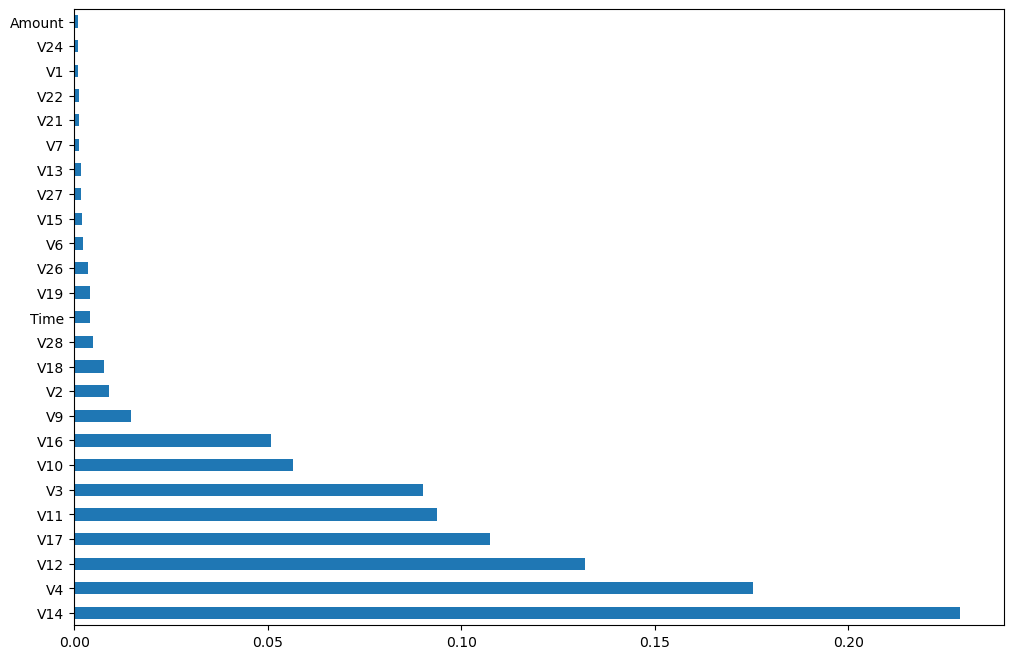

In [33]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(reg.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()

In [34]:
X.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [35]:
#X_new=['Time','V14','V11', 'V12', 'V1','V8','V4','V17','V10','V16','Amount','V9','V18','V3','V27','V21','V5','V7']

In [36]:
X_new=new_data[['Time','V14','V11', 'V12', 'V1','V8','V4','V17','V10','V16','Amount','V9','V18','V3','V27','V21','V5','V7']]
y=new_data['Class']

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.3,random_state=42)

In [38]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(29729, 18)
(12742, 18)
(29729,)
(12742,)


In [39]:
classifiers={
    'support vector classifier':SVC(),
    'Random forest classifier':RandomForestClassifier(),
    'Logistic regression':LogisticRegression()
}

results={}
for name, clf in classifiers.items():
    clf.fit(X_train,y_train)
    pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,pred)
    results[name]=accuracy



# Select the classifier with the highest accuracy
best_classifier = max(results, key=results.get)
best_accuracy = results[best_classifier]

print("\n---------Results--------------\n")
for name, accuracy in results.items():
    print(f"{name}: Accuracy - {accuracy}")

print("\n---------Best Algorithm and Accuracy--------------")
print(f"\nBest Classifier: {best_classifier} with Accuracy - {best_accuracy}")



---------Results--------------

support vector classifier: Accuracy - 0.6970648249882279
Random forest classifier: Accuracy - 0.9996860775388479
Logistic regression: Accuracy - 0.9788102338722335

---------Best Algorithm and Accuracy--------------

Best Classifier: Random forest classifier with Accuracy - 0.9996860775388479


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
model=RandomForestClassifier(min_samples_split=2,n_estimators=200,max_features=6)

In [43]:
model.fit(X_train,y_train)

RandomForestClassifier(max_features=6, n_estimators=200)

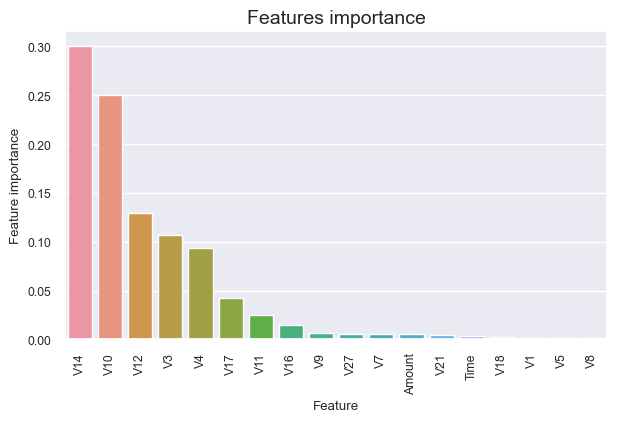

In [56]:
tmp = pd.DataFrame({'Feature': X_new.columns, 'Feature importance': model.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

In [44]:
model.score(X_train,y_train)

1.0

In [45]:
pred=model.predict(X_test)

In [46]:
model.score(X_test,y_test)

0.9997645581541359

In [48]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8472
           1       1.00      1.00      1.00      4270

    accuracy                           1.00     12742
   macro avg       1.00      1.00      1.00     12742
weighted avg       1.00      1.00      1.00     12742



In [49]:
acc=accuracy_score(y_test,pred)
acc

0.9997645581541359

In [50]:
prediction=pd.DataFrame(pred)
new_merge=pd.merge(y_test,prediction,left_index=True, right_index=True)
new_merge

,Class,0
9263,0,1
7298,0,0
4377,0,1
10612,0,0
9724,0,0
...,...,...
11339,0,0
10710,0,0
10896,0,0
12430,0,0


In [51]:
cm=confusion_matrix(y_test,pred)
cm

array([[8469,    3],
       [   0, 4270]], dtype=int64)

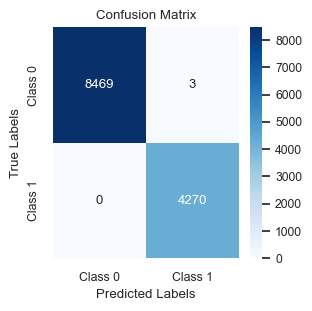

In [52]:
classes = ['Class 0', 'Class 1']

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(3, 3))
sns.set(font_scale=0.8)  # Adjust font size for better readability
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()